<a href="https://colab.research.google.com/github/beyzaturku/Weather_Detection_Using_CNN/blob/main/Weather_Detection_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Giriş nöron sayııs: 64
Epoch sayısı: 12


In [1]:
!python --version

Python 3.11.11


In [2]:
!pip install opencv-python

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_path = '/content/drive/MyDrive/Weather_Detection/wd_dataset.zip'

In [14]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

Google Colab'a dosya yükleme işlemi

In [15]:
from google.colab import files
uploaded = files.upload()

Saving wd_dataset.zip to wd_dataset.zip


In [39]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adamax

Veri Setini Yükleme

In [56]:
image_folder = "Multi-class Weather Dataset"

In [57]:
subfolders = [ 'Cloudy', 'Rain', 'Shine', 'Sunrise']
label_map = { subfolder: idx for idx, subfolder in enumerate(subfolders)}

# List of Images and Labels
images = []
labels = []

# Loading Dataset

for subfolder in subfolders:
    subfolder_path = os.path.join(image_folder, subfolder)
    for filename in os.listdir(subfolder_path):
        img_path = os.path.join(subfolder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img_resized = cv2.resize(img, (224,224))
            images.append(img_resized)
            labels.append(label_map[subfolder])

# Coverted to Numpy Arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the Images
images = images.astype('float32') / 255.0

Bazı Rastgele Örnekler

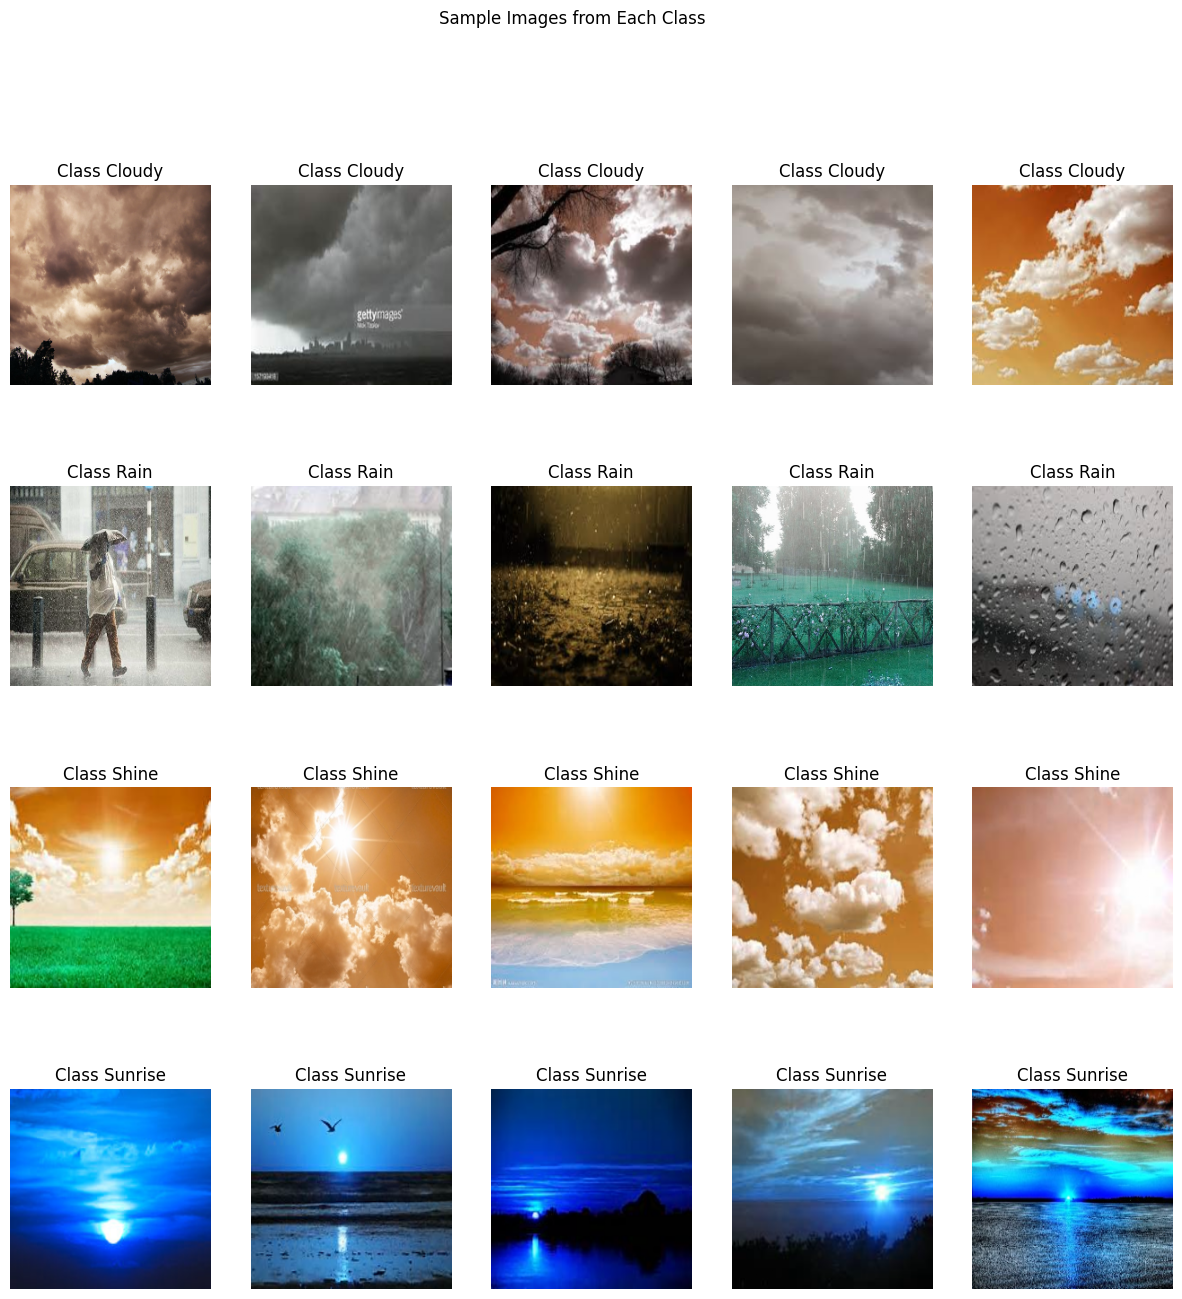

In [58]:
# Plot 5 images from each class
plt.figure(figsize = (15,15))
for i, subfolder in enumerate(subfolders):
    class_indices = np.where(labels == label_map[subfolder])[0]
    for j in range(5):
        plt.subplot(len(subfolders), 5, i*5 + j +1)
        plt.imshow(images[class_indices[j]])
        plt.title(f"Class {subfolder}")
        plt.axis('off')
plt.suptitle('Sample Images from Each Class')
plt.show()

Veri Görselleştirme

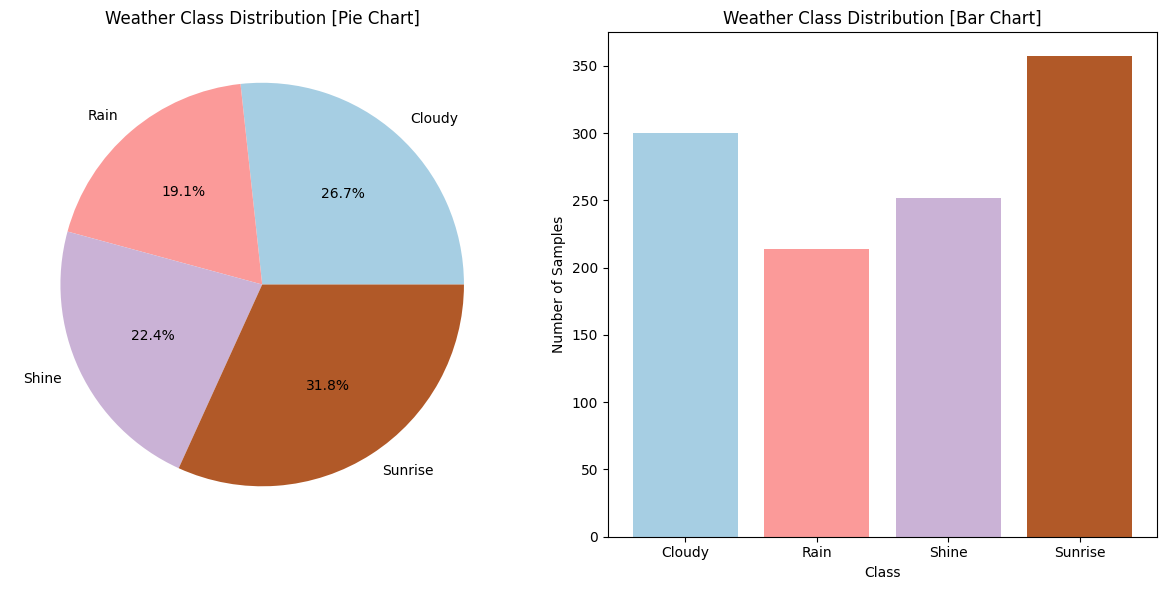

In [59]:
# Visual Representation for Class Distribution [ Pie Chart, Bar Chart]

class_counts = np.bincount(labels)
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
colors = plt.cm.Paired(np.linspace(0, 1, len(class_counts)))
plt.pie(class_counts, labels = subfolders, autopct = '%1.1f%%', colors = colors)
plt.title( 'Weather Class Distribution [Pie Chart]')

plt.subplot(1,2,2)
colors = plt.cm.Paired(np.linspace(0, 1, len(class_counts)))
plt.bar(subfolders, class_counts, color = colors)
plt.title('Weather Class Distribution [Bar Chart]')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

plt.tight_layout()
plt.show()

In [60]:
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes = len(subfolders))

Veri Setini Bölme

In [61]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size = 0.2, stratify = labels_one_hot, random_state = 42)

Model Mimarisi - Basit CNN

In [77]:
model = Sequential([
    Conv2D(32, (3,3), activation ='relu', input_shape = (224,224,3)),
    MaxPooling2D((2,2)),
    Dropout(0.25), # overfitting engellemek için dropout kullanılır.

    Conv2D(64, (3,3), activation ='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation ='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(256, (3,3), activation ='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(512, (3,3), activation ='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dropout(0.1),
    Dense(4, activation = 'softmax')
])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 10, 10, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │          51,204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,619,780 (6.18 MB)

 Trainable params: 1,619,780 (6.18 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer = SGD(learning_rate=0.01, momentum=0.9),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

Model Eğitimi

In [79]:
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 361ms/step - accuracy: 0.3057 - loss: 1.3514 - val_accuracy: 0.5422 - val_loss: 0.9562
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.6211 - loss: 0.7955 - val_accuracy: 0.7111 - val_loss: 0.6369
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.6848 - loss: 0.7782 - val_accuracy: 0.6000 - val_loss: 0.8621
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6945 - loss: 0.7026 - val_accuracy: 0.6311 - val_loss: 0.8163
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7270 - loss: 0.6483 - val_accuracy: 0.5689 - val_loss: 0.8572
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.7385 - loss: 0.5884 - val_accuracy: 0.5378 - val_loss: 1.1900
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.6995 - loss: 0.6679 - val_accuracy: 0.5422 - val_loss: 0.8752
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.7933 - loss: 0.5057 - val_accuracy: 0.6889 -

Model Değerlendirmesi

In [80]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8808 - loss: 0.3440
Test accuracy: 0.8755555748939514
Test loss: 0.3732892870903015


In [81]:
# Classification Report

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred, target_names=subfolders))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
              precision    recall  f1-score   support

      Cloudy       0.82      0.75      0.78        60
        Rain       0.73      0.88      0.80        43
       Shine       0.91      0.86      0.89        50
     Sunrise       1.00      0.99      0.99        72

    accuracy                           0.88       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.88      0.88      0.88       225



Karışıklık Matrisi

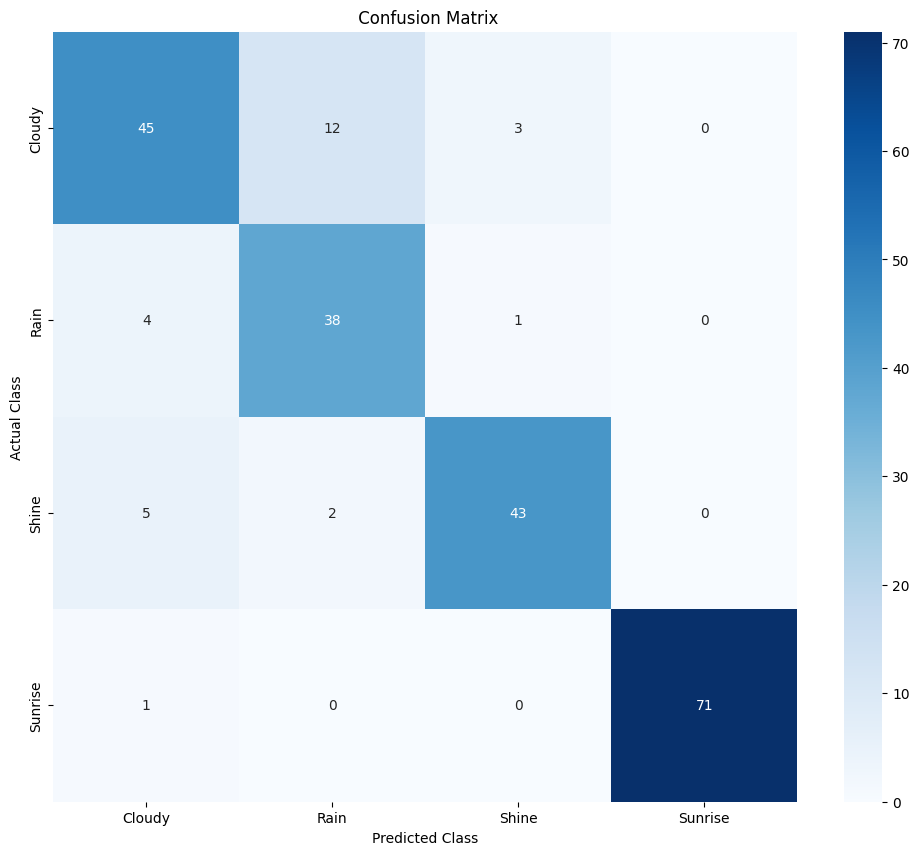

In [82]:
# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (12,10))
sns.heatmap(conf_mat , annot =True, fmt = 'd', cmap = 'Blues', xticklabels = subfolders, yticklabels = subfolders)
plt.title(" Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

Bazı Rastgele Tahmin Çalışmaları

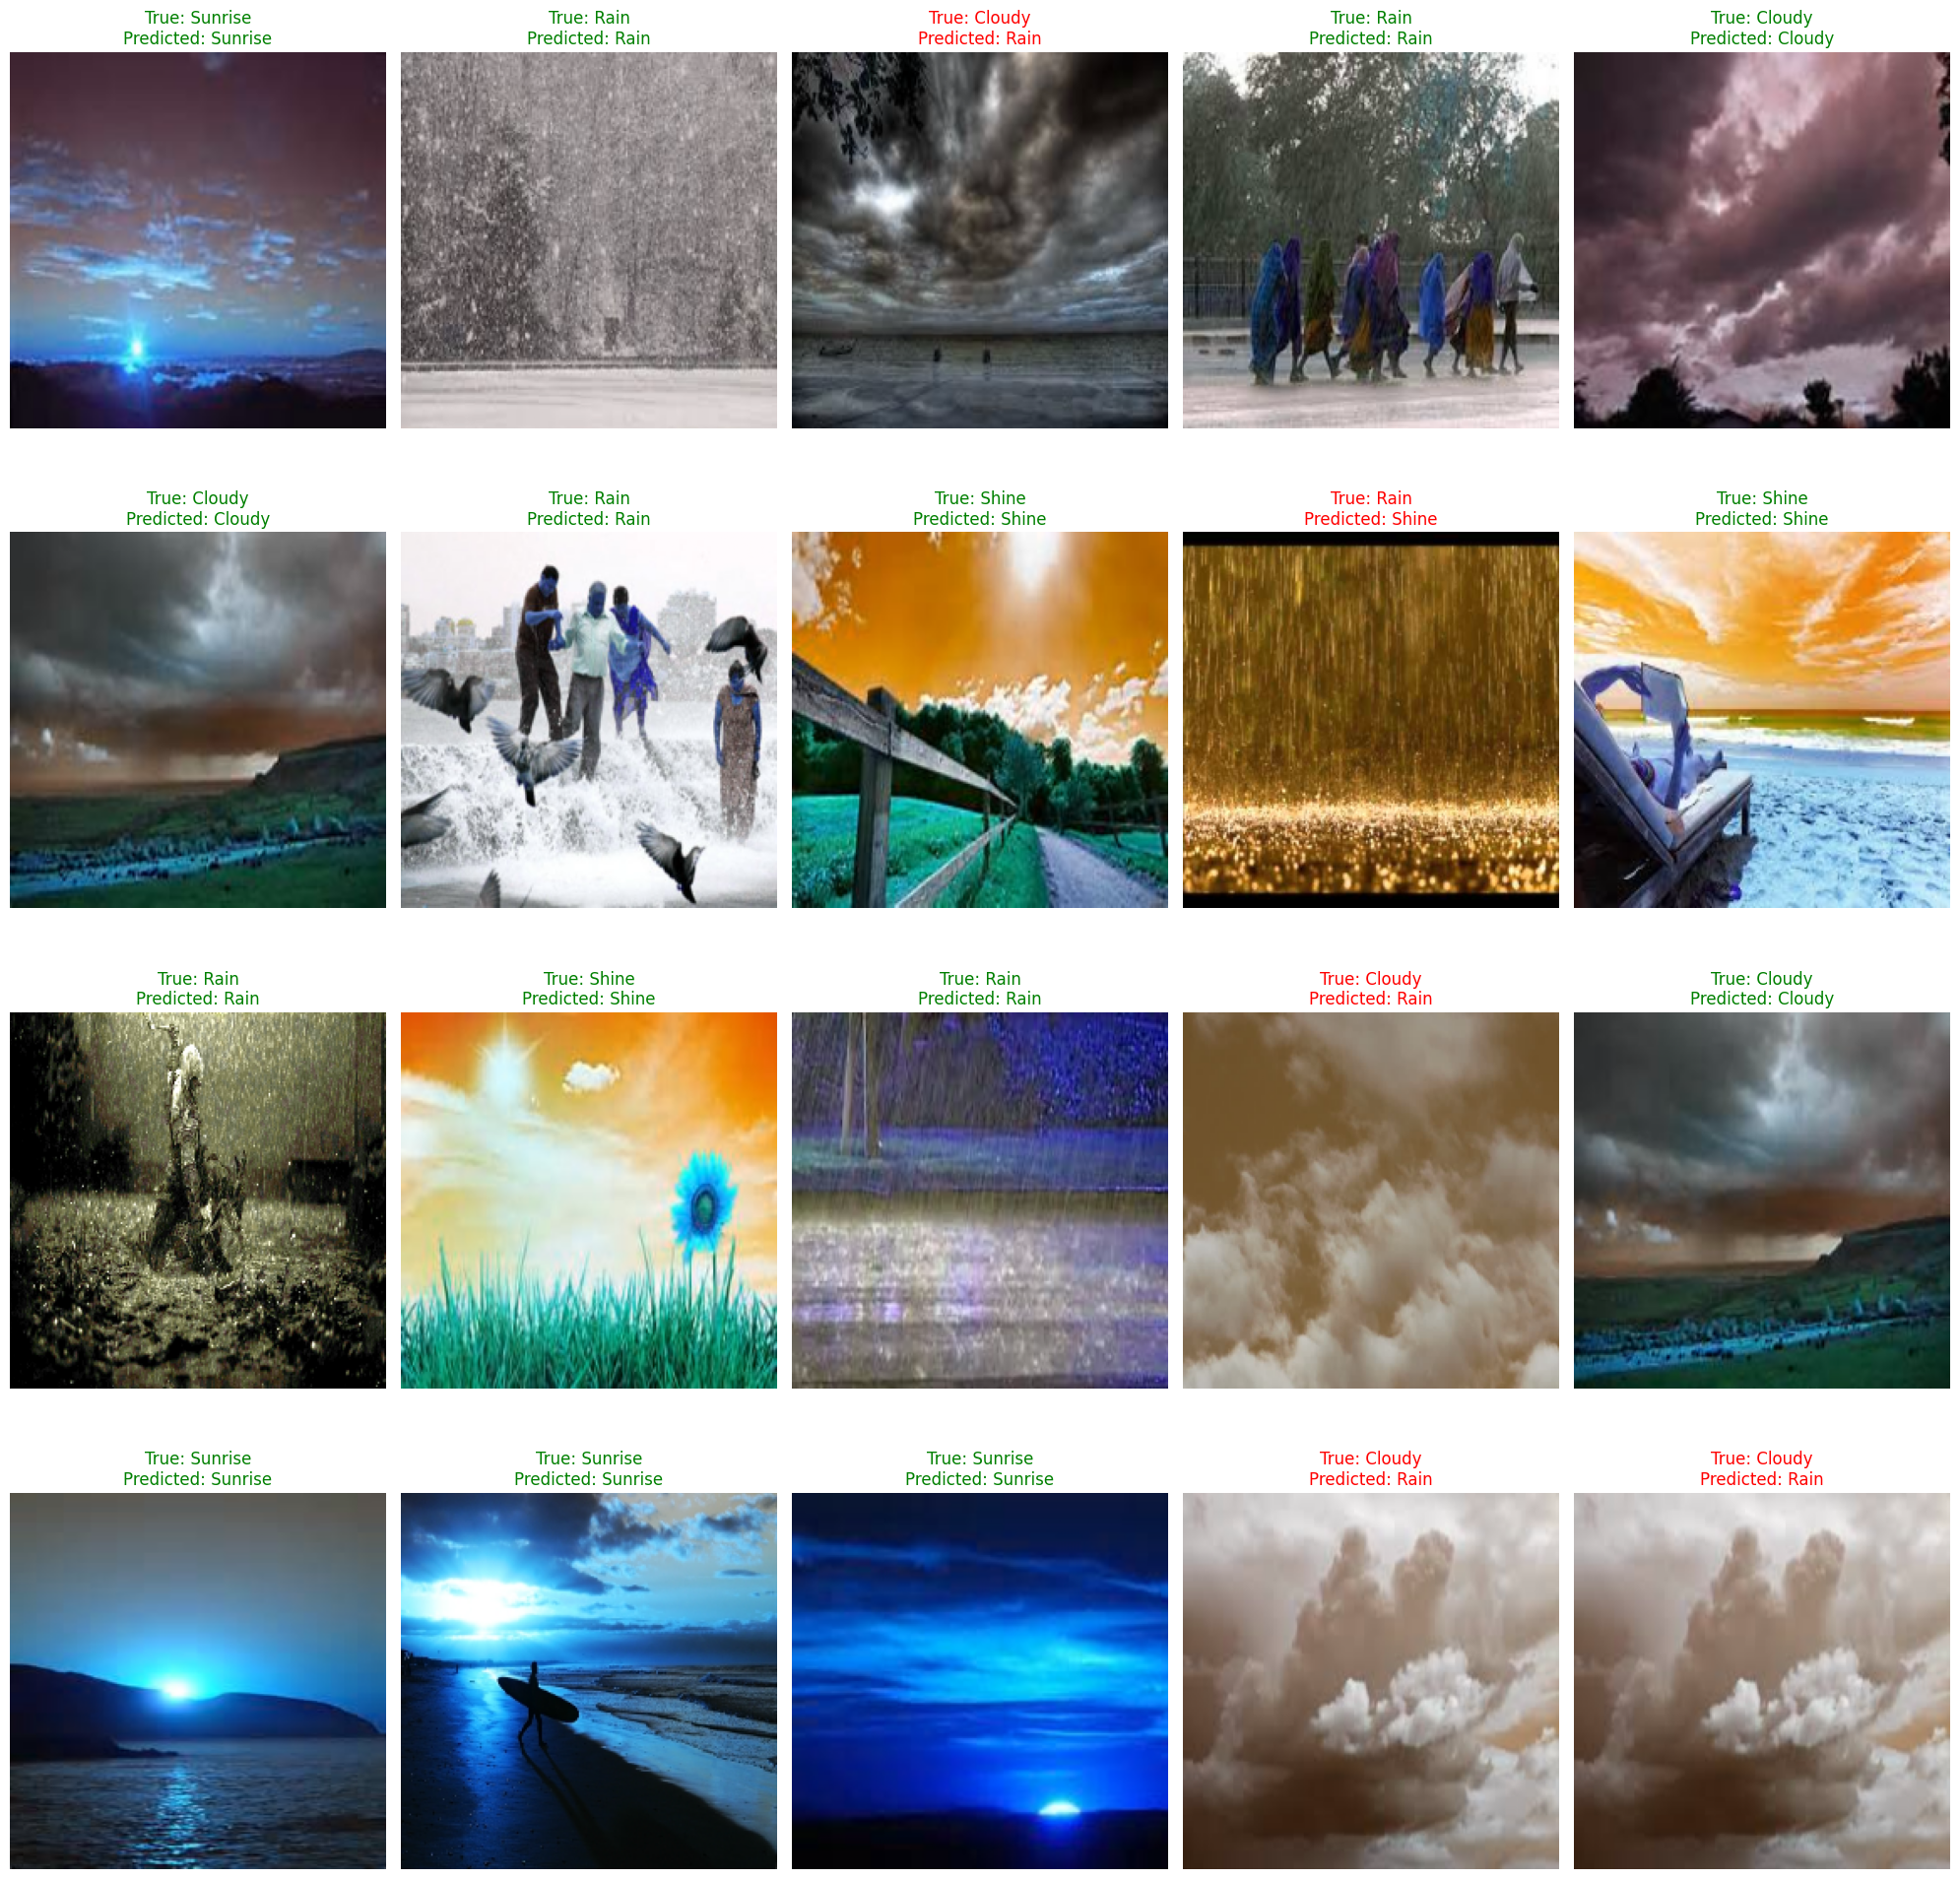

In [83]:
import random

num_samples = 20
rows = 4
wrong_predictions_indices =[]
for idx, (true_label, predicted_label) in enumerate(zip(y_true, y_pred)):
    if true_label != predicted_label:
        wrong_predictions_indices.append(idx)

random_indices = random.sample(range(len(X_test)), num_samples - rows)
random_wrong_indices = random.sample(wrong_predictions_indices, 4)
random_indices.extend(random_wrong_indices)
random_indices = sorted(random_indices)

plt.figure(figsize=(20, 20))
for i, idx in enumerate(random_indices):
    plt.subplot(rows, int(num_samples / rows), i + 1)
    plt.imshow(X_test[idx])
    true_label = y_true[idx]
    true_class = subfolders[true_label]
    predicted_class = subfolders[y_pred[idx]]

    # color-code the correct predictions
    if true_class == predicted_class:
        predicted_color = 'green'
    else:
        predicted_color = 'red'
    plt.title(f'True: {true_class}\nPredicted: {predicted_class}', color=predicted_color)
    plt.axis('off')

plt.tight_layout()
plt.show()